In [80]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data_description.txt
sample_submission.csv
test.csv
train.csv



 **Submission Funtion**

In [81]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

**1. Importing Dataset 
**

Importing and and reading the training and testing data with the help of pandas packages

In [82]:
train_data = pd.read_csv("../input/train.csv")
test_data = pd.read_csv("../input/test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**2. Data Cleaning and Preparation **

**   2.1  Identifying and handling missing data**

In [83]:
missing_data = train_data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Id
False    1460
Name: Id, dtype: int64

MSSubClass
False    1460
Name: MSSubClass, dtype: int64

MSZoning
False    1460
Name: MSZoning, dtype: int64

LotFrontage
False    1201
True      259
Name: LotFrontage, dtype: int64

LotArea
False    1460
Name: LotArea, dtype: int64

Street
False    1460
Name: Street, dtype: int64

Alley
True     1369
False      91
Name: Alley, dtype: int64

LotShape
False    1460
Name: LotShape, dtype: int64

LandContour
False    1460
Name: LandContour, dtype: int64

Utilities
False    1460
Name: Utilities, dtype: int64

LotConfig
False    1460
Name: LotConfig, dtype: int64

LandSlope
False    1460
Name: LandSlope, dtype: int64

Neighborhood
False    1460
Name: Neighborhood, dtype: int64

Condition1
False    1460
Name: Condition1, dtype: int64

Condition2
False    1460
Name: Condition2, dtype: int64

BldgType
False    1460
Name: BldgType, dtype: int64

HouseStyle
False    1460
Name: HouseStyle, dtype: int64

OverallQual
False    1460
Name: OverallQual, dtype: i

In [84]:
cols_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType', 'Functional', 'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2', 'Utilities']

# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train_data[col].fillna('None',inplace=True)
    test_data[col].fillna('None',inplace=True)

# replacing with mode
mode_col = ['MSZoning','Electrical', 'KitchenQual','Exterior2nd', 'Exterior1st','SaleType']
for col in mode_col:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    test_data[col] = test_data[col].fillna(test_data[col].mode()[0])

# replcaing with zero 
for col in ("GarageYrBlt","MasVnrArea"): 
    train_data[col] = train_data[col].fillna(0)

test_zero_Columns= ['GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"]
for col in test_zero_Columns:
    test_data[col] = test_data[col].fillna(0)
    
#replacing with median
train_data["LotFrontage"].replace(np.nan,train_data["LotFrontage"].median(axis=0),inplace = True)
test_data["LotFrontage"].replace(np.nan,train_data["LotFrontage"].median(axis=0),inplace = True)

In [85]:
train_data.isnull().sum().sum()

0

   **2.2 Dealing with Ouliers**


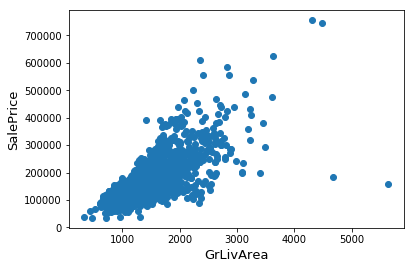

In [86]:
array = [ 'GrLivArea']
for x in array : 
    fig, ax = plt.subplots()
    ax.scatter(train_data[x], train_data['SalePrice'])
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(x, fontsize=13)
    plt.show()

In [87]:
train_data = train_data.drop(train_data[train_data['LotFrontage']>300].index)
train_data = train_data.drop(train_data[(train_data['LotFrontage']>140) & (train_data['SalePrice']<100000)].index)
train_data = train_data.drop(train_data[train_data['LotArea']>40000].index)
train_data = train_data.drop(train_data[train_data['BsmtFinSF1']>5000].index)
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000) & (train_data['SalePrice']<300000)].index)

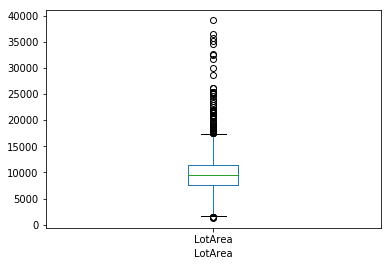

In [88]:
arr = ['LotArea']
for x in arr : 
    train_data[x].plot(kind = 'box')  
    plt.xlabel(x)
    plt.show()

In [89]:
def remove_outlier(df,array):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in array:
        Q1 = df[name].quantile(0.25)
        Q3 = df[name].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = float(Q1 - 1.5 * IQR)
        upper_limit = float(Q3 + 2 * IQR)
        df = df[(df[name] > lower_limit) 
               & (df[name] < upper_limit)]
    return df

In [90]:
array = ['LotArea','BsmtFinSF1','YearBuilt']
print(train_data.shape)
train_data = remove_outlier(train_data,array)
print(train_data.shape)

(1444, 81)
(1389, 81)



   ** 2 . 3   Skewness and Log Transformation **

In [91]:
numeric_feats = train_data.dtypes[train_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train_data[numeric_feats].apply(lambda x: x.skew())
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
Id,0.004642
MSSubClass,1.391213
LotFrontage,0.551526
LotArea,0.054604
OverallQual,0.160134


In [92]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewness = skewness.dropna(axis = 0)
skewness = skewness.drop('SalePrice')
print(skewness)
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train_data[feat] = boxcox1p(train_data[feat], lam)
    test_data[feat] = boxcox1p(test_data[feat], lam)

There are 38 skewed numerical features to Box Cox transform
                    Skew
MSSubClass      1.391213
MasVnrArea      2.560229
BsmtFinSF2      4.309546
BsmtUnfSF       0.933667
1stFlrSF        0.877950
LowQualFinSF    9.391160
GrLivArea       0.777441
BsmtHalfBath    4.183407
KitchenAbvGr    4.441833
GarageYrBlt    -3.932174
WoodDeckSF      1.434698
OpenPorchSF     2.383619
EnclosedPorch   2.809890
3SsnPorch      10.906664
ScreenPorch     4.130535
PoolArea       21.736826
MiscVal        23.942637


**2.4 Processing Categorical Variables**
    
Dealing with ordinal data- the following are the ordinal variables in the data 

In [93]:
fireplaceQc_ord_map = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['FireplaceQu'] = train_data['FireplaceQu'].map(fireplaceQc_ord_map)
test_data['FireplaceQu'] = test_data['FireplaceQu'].map(fireplaceQc_ord_map)

poolQc_ord_map = {'None':0,'Fa':2,'Gd':4,'Ex': 5}
train_data['PoolQC'] = train_data['PoolQC'].map(poolQc_ord_map)
test_data['PoolQC'] = test_data['PoolQC'].map(poolQc_ord_map)

ExterQual_ord_map = {'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['ExterQual'] = train_data['ExterQual'].map(ExterQual_ord_map)
test_data['ExterQual'] = test_data['ExterQual'].map(ExterQual_ord_map)

ExterCond_ord_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['ExterCond'] = train_data['ExterCond'].map(ExterCond_ord_map)
test_data['ExterCond'] = test_data['ExterCond'].map(ExterCond_ord_map)

BsmtQual_ord_map = {'None':0,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['BsmtQual'] = train_data['BsmtQual'].map(BsmtQual_ord_map)
test_data['BsmtQual'] = test_data['BsmtQual'].map(BsmtQual_ord_map)

BsmtCond_ord_map = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4}
train_data['BsmtCond'] = train_data['BsmtCond'].map(BsmtCond_ord_map)
test_data['BsmtCond'] = test_data['BsmtCond'].map(BsmtCond_ord_map)

HeatingQC_ord_map = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['HeatingQC'] = train_data['HeatingQC'].map(HeatingQC_ord_map)
test_data['HeatingQC'] = test_data['HeatingQC'].map(HeatingQC_ord_map)

KitchenQual_ord_map = {'None':0,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['KitchenQual'] = train_data['KitchenQual'].map(KitchenQual_ord_map)
test_data['KitchenQual'] = test_data['KitchenQual'].map(KitchenQual_ord_map)

GarageQual_ord_map = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['GarageQual'] = train_data['GarageQual'].map(GarageQual_ord_map)
test_data['GarageQual'] = test_data['GarageQual'].map(GarageQual_ord_map)


GarageCond_ord_map = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex': 5}
train_data['GarageCond'] = train_data['GarageCond'].map(GarageCond_ord_map)
test_data['GarageCond'] = test_data['GarageCond'].map(GarageCond_ord_map)

**Factorize method**

In [94]:
train_data_fact = train_data.copy()
test_data_fact = test_data.copy()
colnames1 = train_data.select_dtypes(include='object').columns
for col in colnames1:
    train_data_fact[col] = pd.factorize(train_data[col])[0]
colnames2 = test_data.select_dtypes(include='object').columns
for col in colnames2:
    test_data_fact[col] = pd.factorize(test_data[col])[0] 

**Dummy method**

In [95]:
train_data_dum = train_data.copy()
test_data_dum = test_data.copy()
coln= ['MSZoning','Electrical','Functional','SaleType','Condition2',"HouseStyle","RoofMatl","Exterior1st","Exterior2nd","Heating","CentralAir","KitchenQual"]
for col in coln:
    train_data_dum[col] = pd.factorize(train_data_dum[col])[0] 
for col in coln:
    test_data_dum[col] = pd.factorize(test_data_dum[col])[0]

#dummy_array = ["LotShape","LandContour","LotConfig","LandSlope","Neighborhood","Condition1","BldgType","RoofStyle","MasVnrType","Foundation","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageType","GarageFinish","PavedDrive","SaleCondition"]
train_data_dum = pd.get_dummies(train_data_dum)
test_data_dum = pd.get_dummies(test_data_dum)

In [96]:
train_data_fact.shape

(1389, 81)

**3. Feature Engineering **

**3.1 Creating new Variables**

In [97]:
test_data_fact["TotalArea"] = test_data_fact["TotalBsmtSF"]+test_data_fact["1stFlrSF"]+test_data_fact["2ndFlrSF"]
train_data_fact["TotalArea"] = train_data_fact["TotalBsmtSF"]+train_data_fact["1stFlrSF"]+train_data_fact["2ndFlrSF"]

In [98]:
test_data_fact["BathRooms"] = test_data_fact["FullBath"]+0.5*test_data_fact["HalfBath"]
train_data_fact["BathRooms"] = train_data_fact["FullBath"]+0.5*train_data_fact["HalfBath"]

In [99]:
train_data_fact["BsmtBath"] = train_data_fact["BsmtFullBath"]+0.5*train_data_fact["BsmtHalfBath"]
test_data_fact["BsmtBath"] = test_data_fact["BsmtFullBath"]+0.5*test_data_fact["BsmtHalfBath"]

In [100]:
train_data_fact["Year_avg"] = (train_data_fact["YearRemodAdd"]+train_data_fact["YearBuilt"])/2
test_data_fact["Year_avg"] = (test_data_fact["YearRemodAdd"]+test_data_fact["YearBuilt"])/2

In [101]:
train_data_fact["BsmtSF"] = train_data_fact["BsmtFinSF1"]+train_data_fact["BsmtFinSF2"]
test_data_fact["BsmtSF"] = test_data_fact["BsmtFinSF1"]+test_data_fact["BsmtFinSF2"]

In [102]:
corr = train_data_fact[["BsmtSF","BsmtFinSF1","BsmtFinSF2","SalePrice"]].corr()
corr

,BsmtSF,BsmtFinSF1,BsmtFinSF2,SalePrice
BsmtSF,1.000000,0.999975,-0.006745,0.370151
BsmtFinSF1,0.999975,1.000000,-0.013812,0.370510
BsmtFinSF2,-0.006745,-0.013812,1.000000,-0.054659
SalePrice,0.370151,0.370510,-0.054659,1.000000


**3.2 Statistical Analysis**

Bivariate Analysis : Statistical Tests can be used to select those features that has strongest relation with the target feature.

In [103]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = train_data_fact.iloc[:,0:80]
Y = train_data_fact[["SalePrice"]]

#apply SelectKBest class to extract top 10 best features
    
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 10 best features

            Specs          Score
4         LotArea  840656.226331
44       2ndFlrSF  422475.916256
34     BsmtFinSF1  352436.229160
38    TotalBsmtSF  156947.976494
0              Id  150431.454271
62     GarageArea   89126.485232
75        MiscVal    7388.916592
45   LowQualFinSF    5175.826981
36     BsmtFinSF2    4812.762510
70    ScreenPorch    4501.608394
69      3SsnPorch    4230.738691
26     MasVnrArea    3972.427243
68  EnclosedPorch    3824.048069
3     LotFrontage    3767.849445
66     WoodDeckSF    3106.666669


**3.3 Pearson's Correlation**

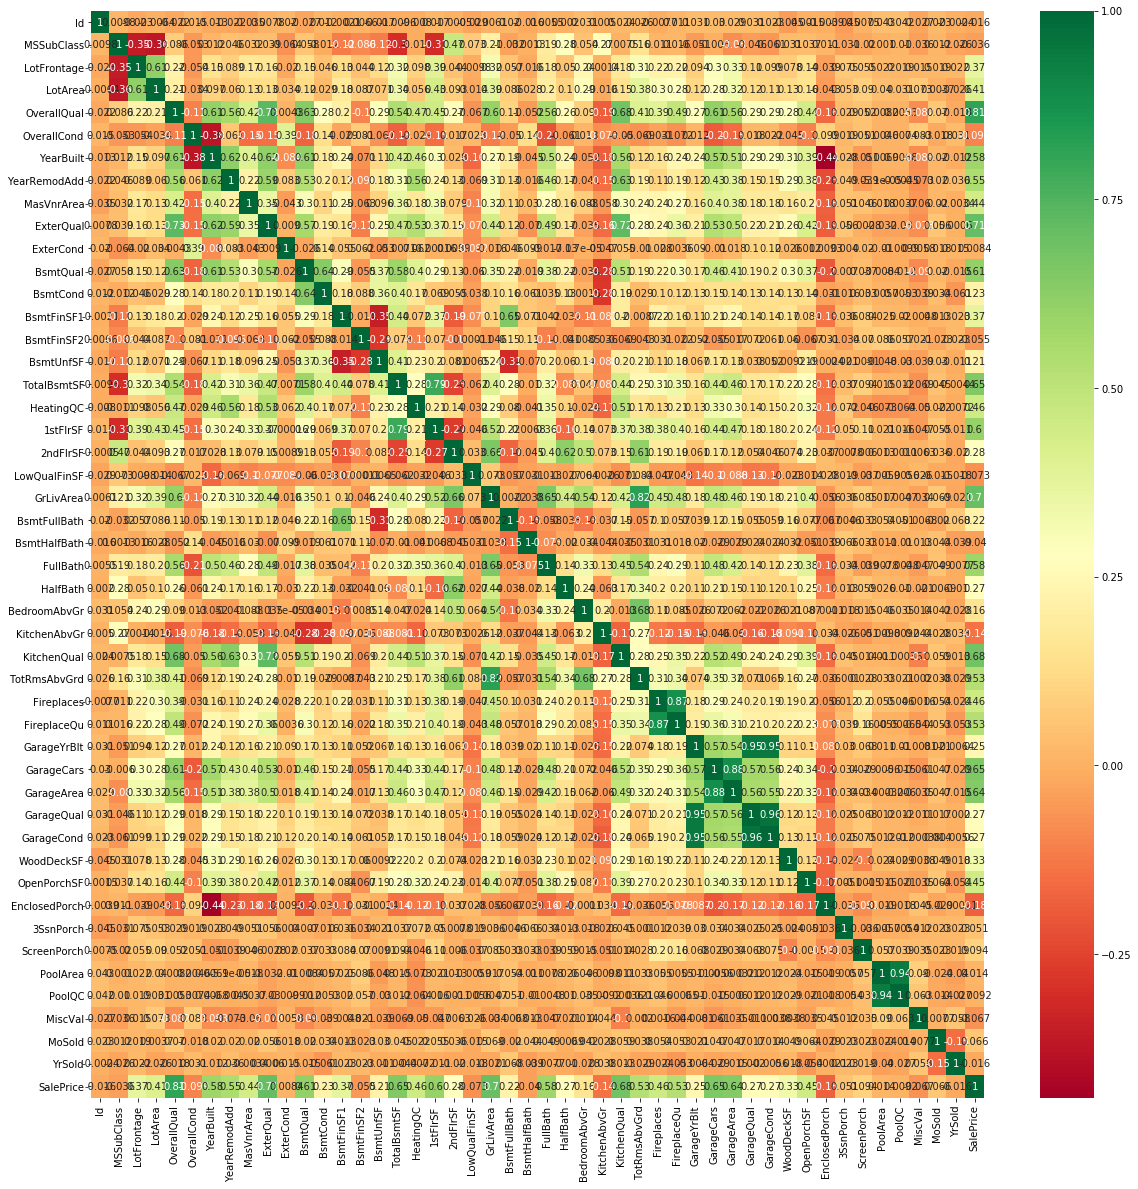

In [104]:
#get correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [105]:
train_quant = train_data_fact.select_dtypes(exclude=['object'])
corr = train_quant.corr()
print(corr["SalePrice"].sort_values(ascending = False))

SalePrice       1.000000
OverallQual     0.812677
TotalArea       0.752046
ExterQual       0.708945
GrLivArea       0.702627
                  ...   
Electrical     -0.242885
GarageType     -0.266947
CentralAir     -0.271194
BsmtFinType1   -0.384560
Foundation     -0.469659
Name: SalePrice, Length: 86, dtype: float64


**3.4  Greedy Algorithm**

In [106]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

lm = LinearRegression()

def LinearRegressionModelWithSplit(X,Y,index):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    model = lm.fit(X_train,y_train)
    score = lm.score(X_train,y_train)
    Y_pred = model.predict(X_train)
    Y_pred[Y_pred < 0] = 0
    #cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_log_error", cv = 5)
    rmsle_train = np.sqrt(-cross_val_score(lm, X_train, y_train, scoring="neg_mean_squared_log_error", cv = 5))
    #rmsle_train = np.sqrt(mean_squared_log_error(y_train, Y_pred))      
    Y_pred_test = model.predict(X_test)
    Y_pred_test[Y_pred_test < 0] = 0
    
    rmsle_test = np.sqrt(mean_squared_log_error(y_test, Y_pred_test))  
    array = np.array([index,X.columns,score,rmsle_train.mean(),rmsle_test])
    return array

In [107]:
X_data = train_data_fact
#X = pd.DataFrame(my_imputer.fit_transform(X))
X = X_data.drop(["SalePrice",'Id'],axis = 1)
df_col = X.columns
columns = ["Feature","Columns","Score","RMSE_Train","RMSE_test"]

def quatitativeFeatureSelection():
    m = 0
    array = []
    index = []
    df_final = pd.DataFrame()
    x = pd.DataFrame()
    while m < 30:         
        df = pd.DataFrame()    
        for i in range(72):
            x= X.iloc[:,i:i+1] 
            if(len(index) != 0):
                for val in index:
                    k = int(val)
                    name = X.iloc[:,k:k+1].columns                    
                    x[name] = X.iloc[:,k:k+1]
            #print(x.columns)    
            y = np.log(X_data[["SalePrice"]]+1)
            array = pd.Series(LinearRegressionModelWithSplit(x,y,i))
            df = df.append(array,ignore_index=True)
            
        df.columns = columns
        min_cross= df['RMSE_Train'].min(axis = 0)
        df_final = df_final.append(df[df['RMSE_Train']== min_cross])
        index.append(df[df['RMSE_Train']== min_cross]["Feature"].values[0])        
        m=m+1
    return df_final
Greedy_df = quatitativeFeatureSelection()
Greedy_col = Greedy_df.iloc[:,1:2]
Greedy_df.head()

,Feature,Columns,Score,RMSE_Train,RMSE_test
16,16.0,"Index(['OverallQual'], dtype='object')",0.695397,0.016694,0.017526
45,45.0,"Index(['GrLivArea', 'OverallQual'], dtype='obj...",0.768962,0.014578,0.014813
33,33.0,"Index(['BsmtFinSF1', 'OverallQual', 'GrLivArea...",0.809914,0.013251,0.013383
18,18.0,"Index(['YearBuilt', 'OverallQual', 'GrLivArea'...",0.840035,0.012164,0.012121
17,17.0,"Index(['OverallCond', 'OverallQual', 'GrLivAre...",0.862845,0.011262,0.011432


In [108]:
col = Greedy_df.iloc[15,1:2]
for i in col:
    print(i)

Index(['BsmtFullBath', 'OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt',
       'OverallCond', 'LotArea', 'TotalBsmtSF', 'KitchenQual', 'GarageCars',
       'Functional', 'HeatingQC', 'FireplaceQu', 'ScreenPorch', 'BldgType',
       'ExterQual'],
      dtype='object')


**4. Model Development **

 **4.1 Multiple Linear Regression**

In [109]:
import matplotlib

def ResidualPlot(X,Y,model):    
    matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
    Y_pred = model.predict(X)
    preds = pd.DataFrame(Y)
    preds['pred'] = Y_pred  
    preds["residuals"] = preds["SalePrice"] - preds["pred"]
    preds.plot(x = "pred", y = "residuals",kind = "scatter")\
    
def logsubmission(X_test, model,ID):        
    Y_pred = np.expm1(model.predict(X_test))
    
    Y_df = pd.DataFrame(ID)
    Y_df['SalePrice'] = Y_pred    
    Y_df.to_csv('test.csv',index=False)
    return Y_df

def RegressionModelDevelopment(feature_array,train,test):
    X = train[feature_array]
    Y = np.log(train["SalePrice"]+1)   
    print(LinearRegressionModelWithSplit(X,Y,2))
    model = LinearRegression().fit(X,Y)
    ResidualPlot(X,Y,model)
    df = pd.DataFrame(logsubmission(test[feature_array],model,test['Id']))
    #link = create_download_link(df) 
    return df

[2
 Index(['BedroomAbvGr', 'OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt',
       'OverallCond', 'LotArea', 'TotalBsmtSF', 'KitchenQual', 'GarageCars',
       'Functional', 'HeatingQC', 'FireplaceQu', 'ScreenPorch', 'BldgType',
       'ExterQual', 'BsmtFullBath', 'Condition1', 'WoodDeckSF', 'KitchenAbvGr',
       'FullBath', 'GarageArea', 'YearRemodAdd', 'LowQualFinSF', 'Condition2'],
      dtype='object')
 0.9138823744249996 0.009155488388866222 0.009680599082033134]


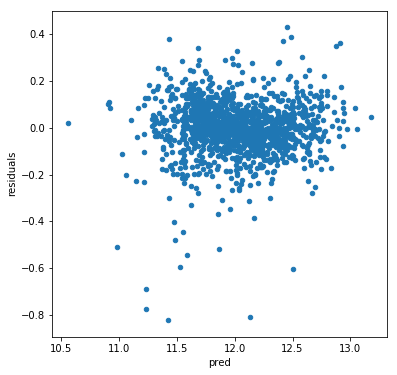

In [110]:
#Best Features obtrained from greedy algorithm
#features = ["TotalBsmtSF",'BsmtExposure', 'OverallQual', 'GrLivArea', 'YearBuilt', 'BsmtFinSF1','OverallCond', 'LotArea', 'GarageCars', 'FireplaceQu','BldgType', 'KitchenQual', 'Condition1', 'Functional', 'PavedDrive','HeatingQC', 'ScreenPorch', 'LotFrontage', 'CentralAir', 'YearRemodAdd','Street', 'GarageArea', 'BsmtFullBath', 'FullBath', 'HalfBath','LandContour', 'ExterQual', 'KitchenAbvGr', 'PoolQC']
features = ['BedroomAbvGr', 'OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt','OverallCond', 'LotArea', 'TotalBsmtSF', 'KitchenQual', 'GarageCars','Functional', 'HeatingQC', 'FireplaceQu', 'ScreenPorch', 'BldgType','ExterQual', 'BsmtFullBath', 'Condition1', 'WoodDeckSF', 'KitchenAbvGr','FullBath', 'GarageArea', 'YearRemodAdd', 'LowQualFinSF', 'Condition2']      
df = RegressionModelDevelopment(features,train_data_fact,test_data_fact)
create_download_link(df) 

 **4.2 Ridge Regression**

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

def bestAlpha(X,Y,model):
    parameters= {'alpha':[x for x in range(1,101)]}

    ridge_reg=GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_log_error', cv=15)
    ridge_reg.fit(X,Y)
    print("The best value of Alpha is: ",ridge_reg.best_params_)
    print("The best score achieved with Alpha=20 is: ",np.sqrt(-ridge_reg.best_score_))
    return ridge_reg.best_score_

In [112]:
def RidgeModelDevelopment(feature_array,train,test):
    X = train[feature_array]
    Y = np.log(train["SalePrice"]+1)       
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    
    alpha = bestAlpha(X,Y,Ridge())    
    ridge_mod=Ridge(alpha=alpha,normalize = True)
    ridge_mod.fit(X_train,y_train)
    y_pred_train=ridge_mod.predict(X_train)
    cross_val_score(ridge_mod, X_train, y_train, scoring="neg_mean_squared_log_error", cv = 5)
    rmsle_train = np.sqrt(-cross_val_score(ridge_mod, X_train, y_train, scoring="neg_mean_squared_log_error", cv = 5))
    print("Root mean squared log error train:"+str(rmsle_train.mean()))
    print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 
    
    y_pred_test=ridge_mod.predict(X_test)        
    rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test)) 
    print("Root mean squared log error test:"+str(rmsle_test))
    print('Root Mean Square error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 
    
    print(ridge_mod.coef_)
    #model = LinearRegression().fit(X,Y)
    ResidualPlot(X,Y,ridge_mod)
    df = pd.DataFrame(logsubmission(test[feature_array],ridge_mod,test['Id']))
    link = create_download_link(df) 
    return df

In [113]:
df = RidgeModelDevelopment(features,train_data_fact,test_data_fact)
create_download_link(df)

NameError: name 'feat_16' is not defined

In [ ]:
###Model Ridge regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

X_train = train_data_fact[['BsmtFullBath', 'OverallQual', 'GrLivArea', 'YearBuilt', 'BsmtFinSF1','OverallCond', 'TotalArea', 'LotArea', 'GarageCars', 'KitchenQual','Functional', 'FireplaceQu', 'HeatingQC', 'ScreenPorch', 'BldgType','ExterQual']]

y = np.log(train_data_fact[["SalePrice"]]+1)

cross_val_score(Ridge(), X_train, y, scoring="neg_mean_squared_log_error", cv = 5)
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), X_train, y, scoring="neg_mean_squared_log_error", cv = 5))
rmse_ridge

alphas = [1e-15,1e-10,1e-8,1e-4,1e-3,0.01,0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_log_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

 **4.3 Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
def LassoModelDevelopment(feature_array,train,test):
    X = train[feature_array]
    Y = np.log(train["SalePrice"]+1)       
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    
    alpha = bestAlpha(X,Y,Lasso())    
    lasso_mod=Lasso(alpha=alpha,normalize = True)
    lasso_mod.fit(X_train,y_train)
    y_pred_train=lasso_mod.predict(X_train)
    cross_val_score(lasso_mod, X_train, y_train, scoring="neg_mean_squared_log_error", cv = 5)
    rmsle_train = np.sqrt(-cross_val_score(lasso_mod, X_train, y_train, scoring="neg_mean_squared_log_error", cv = 5))
    print("Root mean squared log error train:"+str(rmsle_train.mean()))
    print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train)))) 
    
    y_pred_test=lasso_mod.predict(X_test)        
    rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred_test)) 
    print("Root mean squared log error test:"+str(rmsle_test))
    print('Root Mean Square error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 
    
    print(lasso_mod.coef_)
    #model = LinearRegression().fit(X,Y)
    ResidualPlot(X,Y,lasso_mod)
    df = pd.DataFrame(logsubmission(test[feature_array],lasso_mod,test['Id']))
    link = create_download_link(df) 
    return df

In [ ]:
LassoModelDevelopment(features,train_data_fact,test_data_fact)

**4.4 Ensemble Modeling**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree

In [ ]:
features = ['BedroomAbvGr', 'OverallQual', 'GrLivArea', 'BsmtFinSF1', 'YearBuilt','OverallCond', 'LotArea', 'TotalBsmtSF', 'KitchenQual', 'GarageCars','Functional', 'HeatingQC', 'FireplaceQu', 'ScreenPorch', 'BldgType','ExterQual', 'BsmtFullBath', 'Condition1', 'WoodDeckSF', 'KitchenAbvGr','FullBath', 'GarageArea', 'YearRemodAdd', 'LowQualFinSF', 'Condition2']
X = train_data_fact[features]
Y = np.log(train_data_fact["SalePrice"]+1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
ensemble_col = ['Model_Name','Score','Train_rmsle','Test_rmsle']
ensemble_df = pd.DataFrame(columns =ensemble_col )


In [ ]:

def Model(model,ensemble_df):
    reg = model.fit(x_train,y_train)
    score = model.score(x_train,y_train)
    y_pred =  model.predict(x_test)
    rmsle_train = np.sqrt(-cross_val_score(model,x_train,y_train,scoring = "neg_mean_squared_log_error",cv = 5))
    rmsle_test = np.sqrt(mean_squared_log_error(y_test, y_pred)) 
    ensemble_df = ensemble_df.append({'Model_Name' : str(model) , 'Score' : score,'Train_rmsle':rmsle_train.mean(),"Test_rmsle":rmsle_test},ignore_index=True)
    print("Score "+str(score))
    print("rmsle_train "+str(rmsle_train.mean()))
    print("rmsle_test "+str(rmsle_test))
    print(" ")
    return ensemble_df

**1. Regression Model**

In [ ]:
lm = LinearRegression()
ensemble_df = Model(lm,ensemble_df)

In [ ]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lm,parameters, cv=None)
ensemble_df = Model(lm,ensemble_df)

**2. Ridge Regression**

In [ ]:
ridge = make_pipeline(RobustScaler(), Ridge(alpha =10, random_state=1))
ensemble_df = Model(ridge,ensemble_df)

**3. Lasso Regression **

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.001, random_state=1))
ensemble_df = Model(lasso,ensemble_df)

In [ ]:
ensemble_df

**4.  Bagging Meta- estimator**

In [ ]:
bagging = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
ensemble_df = Model(bagging,ensemble_df)

**5.  GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt',min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
ensemble_df = Model(GBR,ensemble_df)
df = pd.DataFrame(logsubmission(test_data_fact[features],GBR,test_data_fact['Id']))
#create_download_link(df)

**6. XGBoost**

In [ ]:
import xgboost as xgb
xgb_reg=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3,min_child_weight=1.7817, n_estimators=2200,reg_alpha=0.4640, reg_lambda=0.8571,subsample=0.5213, silent=1,random_state =7, nthread = -1) 
ensemble_df = Model(xgb_reg,ensemble_df)                             
                    

In [ ]:
xgb_reg1=xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bylevel=1, colsample_bynode=1,colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,n_estimators=100, n_jobs=1, nthread=-1,objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1,scale_pos_weight=1, seed=None, silent=None,subsample=1, verbosity=1)
ensemble_df = Model(xgb_reg1,ensemble_df)     

**7. Voting Regressor**

In [ ]:
from sklearn.ensemble import VotingRegressor
ridge_mod = Ridge(alpha = 20)
lasso_mod = Lasso(alpha = 1)
vote_mod = VotingRegressor([('Ridge', ridge_mod), ('lm',LinearRegression())])
ensemble_df = Model(vote_mod,ensemble_df)
df = pd.DataFrame(logsubmission(test_data_fact[features],vote_mod,test_data_fact['Id']))
#create_download_link(df)

**8. Stacking Regressor**

In [ ]:
from mlxtend.regressor import StackingRegressor

lm = LinearRegression()
stregr = StackingRegressor(regressors=[ridge_mod,lm, vote_mod,lasso_mod], meta_regressor=xgb_reg, use_features_in_secondary=True)
ensemble_df = Model(stregr,ensemble_df)
#df = pd.DataFrame(logsubmission(test_data_fact[features],stack_mod,test_data_fact['Id']))
#create_download_link(df)

In [ ]:
ensemble_df

**9. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=1000, random_state=0, n_jobs=-1)
X = train_data_dum
Y = train_data_dum['SalePrice']
X = train_data_dum.drop("SalePrice",axis =1)

# Train the classifier
clf.fit(X,Y)
names = X.columns
print ("Features sorted by their score:")
RF_feat = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), names),reverse=True))
             

In [ ]:
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 400, random_state = 0) 
  
# fit the regressor with x and y data 
ensemble_df = Model(regressor,ensemble_df)

In [ ]:
ensemble_df

**9. Average Model**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_data_fact.values)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
averaged_models = AveragingModels(models = (stregr, GBR, ridge))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
model1 = averaged_models.fit(x_train,y_train)
df = pd.DataFrame(logsubmission(test_data_fact[features],model1,test_data_fact['Id']))
create_download_link(df)